<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Capstone Project - Battle of Neighborhoods</font></h1>

## Introduction

In this project, we will be exploring and comparing National Parks in the Unites States. The National Parks attract tens of thousands of visitors every year. Planning visit to a national park involves exploring venues in and around the park area and choosing the best options for individual(s). This can be a tedious work as it can involve looking for several websites, as well as social networking sites to get recommendations, ratings etc.

This project is aimed at helping those who would like to gather venue resource information and equip the visitors with more in-depth analysis of venues around the National Parks in United States.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Exploratory Data Analysis</a>

3. <a href="#item3">Analyze Each Park</a>

4. <a href="#item4">Cluster the Parks</a>

5. <a href="#item5">Examine Clusters</a>

6. <a href="#item6">Recommendation engine</a>
    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library


! pip install seaborn

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


<a id='item1'></a>

## 1. Download and Explore Dataset

#### Let's first load the data.

In [2]:
df = pd.read_excel('us_nps.xlsx')    

Let's take a quick look at what the data looks like.

In [3]:
df.head()

,Geo Point,Geo Shape,CODE,Notes,Name,Date,State,Region,ID,Type,CREATED_BY,METADATA,Parkname
0,"34.0977491448, -118.770859533","{""type"": ""Polygon"", ""coordinates"": [[[-118.716...",SAMO,LEGACY: contact denise_kamradt@nps.gov for add...,Santa Monica Mountains National Recreation Area,2015-04-21 17:00:00-07:00,CA,PW,277263,National Recreation Area,Legacy,NaN,Santa Monica Mountains
1,"40.6966421334, -73.0002301769","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-7...",FIIS,LEGACY: NPS Inventory and Monitoring Program D...,Fire Island National Seashore,2013-12-17 16:00:00-08:00,NY,NE,970121,National Seashore,Legacy,NaN,NaN
2,"38.9108851133, -77.0243087533","{""type"": ""Polygon"", ""coordinates"": [[[-77.0241...",CAWO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Carter G. Woodson National Historic Site,2006-03-21 16:00:00-08:00,MD,NC,2085144,National Historic Site,Lands,https://irma.nps.gov/App/Reference/Profile/104...,Carter G. Woodson Home
3,"41.6648654811, -81.3508655709","{""type"": ""Polygon"", ""coordinates"": [[[-81.3501...",JAGA,Lands - http://landsnet.nps.gov/tractsnet/docu...,James A. Garfield National Historic Site,2010-09-06 17:00:00-07:00,OH,MW,1888932,National Historic Site,Lands,https://irma.nps.gov/App/Reference/Profile/216...,James A Garfield
4,"37.0778876287, -110.965509872","{""type"": ""Polygon"", ""coordinates"": [[[-110.960...",RABR,Lands - http://landsnet.nps.gov/tractsnet/docu...,Rainbow Bridge National Monument,2010-03-28 17:00:00-07:00,UT,IM,23944,National Monument,Lands,https://irma.nps.gov/App/Reference/Profile/216...,Rainbow Bridge


In [4]:
df.shape

(420, 13)

#### Data cleaning and wrangling

##### Let's remove duplicate copies, if there are any, and check how many unique entries are found.

In [5]:
df.drop_duplicates(keep=False,inplace=True)
df.shape

(420, 13)

Looks like there are no duplicate entires.

 ##### Next, we will split the 'Geo Point' column into Latitude and Longitude columns.

In [6]:
df_split = df['Geo Point'].str.split(',',1)
df['Latitude'] = df_split.str.get(0)
df['Longitude'] = df_split.str.get(1)
df.columns

Index(['Geo Point', 'Geo Shape', 'CODE', 'Notes', 'Name', 'Date', 'State',
       'Region', 'ID', 'Type', 'CREATED_BY', 'METADATA', 'Parkname',
       'Latitude', 'Longitude'],
      dtype='object')

##### And remove all the non-required columns, such as CODE, Notes, Date etc.

In [7]:
df.drop(['Geo Point','Geo Shape','CODE','Notes','Name','Date','ID','CREATED_BY','METADATA'],axis=1,inplace = True)

In [8]:
df.head()

,State,Region,Type,Parkname,Latitude,Longitude
0,CA,PW,National Recreation Area,Santa Monica Mountains,34.0977491448,-118.770859533
1,NY,NE,National Seashore,NaN,40.6966421334,-73.0002301769
2,MD,NC,National Historic Site,Carter G. Woodson Home,38.9108851133,-77.0243087533
3,OH,MW,National Historic Site,James A Garfield,41.6648654811,-81.3508655709
4,UT,IM,National Monument,Rainbow Bridge,37.0778876287,-110.965509872


In [9]:
df.shape

(420, 6)

##### Handling missing values

This dataset requires only factual data, so missing values cannot be predicted or assigned. Therefore, we will simply delete the rows that have any missing values. 

In [10]:
df.dropna(axis=0,how='any',inplace=True)
df.head()

,State,Region,Type,Parkname,Latitude,Longitude
0,CA,PW,National Recreation Area,Santa Monica Mountains,34.0977491448,-118.770859533
2,MD,NC,National Historic Site,Carter G. Woodson Home,38.9108851133,-77.0243087533
3,OH,MW,National Historic Site,James A Garfield,41.6648654811,-81.3508655709
4,UT,IM,National Monument,Rainbow Bridge,37.0778876287,-110.965509872
5,VA,NE,National Historical Park,Appomattox Court House,37.3802206838,-78.7985703463


In [11]:
df.shape

(389, 6)

##### Let's check data types of the dataframe, and see if we need to correct any datatypes.

In [12]:
df.dtypes

State        object
Region       object
Type         object
Parkname     object
Latitude     object
Longitude    object
dtype: object

It appears that the Latitude and Longitude data are of type 'object'. We need to convert it to type 'float'.

In [13]:
df=df.astype({'Latitude':float,'Longitude':float})
df.dtypes

State         object
Region        object
Type          object
Parkname      object
Latitude     float64
Longitude    float64
dtype: object

In [14]:
df.head()

,State,Region,Type,Parkname,Latitude,Longitude
0,CA,PW,National Recreation Area,Santa Monica Mountains,34.097749,-118.770860
2,MD,NC,National Historic Site,Carter G. Woodson Home,38.910885,-77.024309
3,OH,MW,National Historic Site,James A Garfield,41.664865,-81.350866
4,UT,IM,National Monument,Rainbow Bridge,37.077888,-110.965510
5,VA,NE,National Historical Park,Appomattox Court House,37.380221,-78.798570


In [15]:
df = df.loc[df['Type'].str.contains("Park")]
df.head()

,State,Region,Type,Parkname,Latitude,Longitude
5,VA,NE,National Historical Park,Appomattox Court House,37.380221,-78.798570
6,NY,NE,National Historical Park,Women's Rights,42.908170,-76.816558
8,CA,PW,National Park,Pinnacles,36.490396,-121.181168
9,DE,NE,National Historical Park,First State,39.830758,-75.563539
16,OH,MW,National Park,Cuyahoga Valley,41.259102,-81.570988


In [16]:
df.shape

(119, 6)

<a id='item2'></a>

## 2. Explaratory Data Analysis

Let's begin by using geopy library to get the latitude and longitude of the United States of America

In [17]:
address = 'USA'

geolocator = Nominatim(country_bias='us')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of USA are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `country_bias` argument of the Nominatim.__init__ is deprecated and will be removed in geopy 2.0. Use Nominatim.geocode(country_codes='us') instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinates of USA are 39.7837304, -100.4458825.


Now let's map the data

In [18]:
# create map of United States using latitude and longitude values
map_NP = folium.Map(location=[latitude, longitude], zoom_start=3, tiles='Stamen Terrain')

# add markers to map to indicate locations of National Parks
for lat, lng, name in zip(df['Latitude'], df['Longitude'],df['Parkname']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NP)  
    
map_NP

#### Data preprocessing

Let's group the parks according to the states

In [19]:
df_statewise = df.groupby('State')

In [20]:
df_groupcount = df_statewise.count()
df_groupcount.rename(columns={"Parkname":"count"},inplace=True)
df_groupcount.drop(['Region','Type','Latitude','Longitude'],axis=1,inplace=True)
df_groupcount.reset_index()

,State,count
0,AK,10
1,AL,1
2,AR,2
3,AS,1
4,AZ,4
5,CA,10
6,CO,4
7,DC,3
8,DE,1
9,FL,2


##### Bar plot

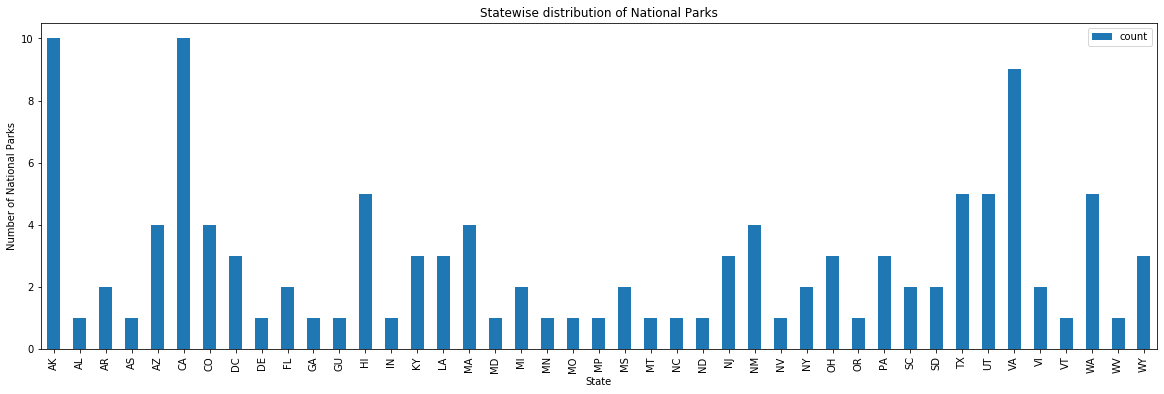

In [21]:
df_groupcount.plot(kind='bar', figsize=(20, 6))

plt.xlabel('State') # add to x-label to the plot
plt.ylabel('Number of National Parks') # add y-label to the plot
plt.title('Statewise distribution of National Parks') # add title to the plot

plt.show()

Let's sort the States starting with most number of parks

In [22]:
df_sorted = df_groupcount['count'].sort_values(ascending=False).reset_index(level='State')
#df_sorted = df_sorted.iloc[0:10].reset_index(level='State')
df_sorted

,State,count
0,AK,10
1,CA,10
2,VA,9
3,WA,5
4,UT,5
5,TX,5
6,HI,5
7,NM,4
8,AZ,4
9,CO,4


##### Bins visualization

Text(0.5, 1.0, 'Bins of Park count')

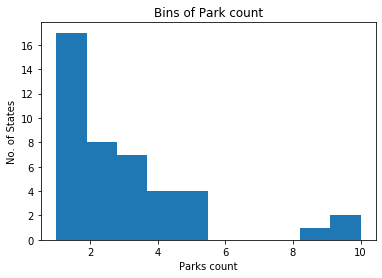

In [23]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "count" with bins = 7
plt.pyplot.hist(df_sorted["count"], bins = 10)

# set x/y labels and plot title
plt.pyplot.xlabel("Parks count")
plt.pyplot.ylabel("No. of States")
plt.pyplot.title("Bins of Park count")

Let's get the coordinate information from original cleaned-up database for sorted park database.

In [24]:
df = pd.merge(df,df_sorted)
df

,State,Region,Type,Parkname,Latitude,Longitude,count
0,VA,NE,National Historical Park,Appomattox Court House,37.380221,-78.798570,9
1,VA,NC,National Battlefield Park,Manassas,38.818951,-77.533331,9
2,VA,NE,National Historical Park,Colonial,37.222785,-76.625423,9
3,VA,NE,National Military Park,Fredericksburg & Spotsylvania,38.282439,-77.644829,9
4,VA,NE,National Historical Park,Cedar Creek & Belle Grove,39.009350,-78.306193,9
...,...,...,...,...,...,...,...
114,MO,MW,National Park,Gateway Arch,38.623288,-90.180396,1
115,VT,NE,National Historical Park,Marsh - Billings - Rockefeller,43.633421,-72.534770,1
116,NC,SE,National Military Park,Guilford Courthouse,36.132255,-79.842456,1
117,WV,NC,National Historical Park,Harpers Ferry,39.318705,-77.741902,1


### Next, we are going to start utilizing the Foursquare API to explore the parks and segment them.

#### Define Foursquare Credentials and Version

In [25]:
CLIENT_ID = 'L2AXLDNHHTTGKLO2LS2NUEGIALEW0LRKPEGKUZYWCGHNBFFX'
CLIENT_SECRET = 'DVOVU2A5O3GQNU11FJIL4POSEKYTHCZI31VGGVGCNRRQWNAI' 
VERSION = '20180605' # Foursquare API version

print('My Foursqaure credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My Foursqaure credentials:
CLIENT_ID: L2AXLDNHHTTGKLO2LS2NUEGIALEW0LRKPEGKUZYWCGHNBFFX
CLIENT_SECRET:DVOVU2A5O3GQNU11FJIL4POSEKYTHCZI31VGGVGCNRRQWNAI


<a id='item2'></a>

### Exploring National Parks'surrounding venues using Foursquare API

Let's create a function to get nearby venues for all the National Parks

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Parkname', 
                  'Park Latitude', 
                  'Park Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each park and create a new dataframe called *NP_venues*.

In [27]:
# type your answer here
radius = 500
LIMIT = 100

NP_venues = getNearbyVenues(names=df['Parkname'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )



Appomattox Court House
Manassas
Colonial
Fredericksburg & Spotsylvania
Cedar Creek & Belle Grove
Wolf Trap NP for the Performing Arts
Prince William Forest
Richmond
George Washington
Women's Rights
Saratoga
Pinnacles
Joshua Tree
Channel Islands
Sequoia
Yosemite
Death Valley
San Francisco Maritime
Rosie the Riveter WWII Home Front
Kings Canyon
Lassen Volcanic
First State
Cuyahoga Valley
Hopewell Culture
Dayton Aviation Heritage
Kenai Fjords
Katmai
Gates of the Arctic
Wrangell - St Elias
Kobuk Valley
Sitka
Lake Clark
Denali
Glacier Bay
Klondike Gold Rush
George Rogers Clark
Morristown
Paterson Great Falls
Thomas Edison
Palo Alto Battlefield
San Antonio Missions
Lyndon B Johnson
Guadalupe Mountains
Big Bend
San Juan Island
Mount Rainier
Olympic
North Cascades
Lewis and Clark
Mesa Verde
Great Sand Dunes
Rocky Mountain
Black Canyon of the Gunnison
New Bedford Whaling
Minute Man
Adams
Boston
Keweenaw
River Raisin
Virgin Islands
Salt River Bay
Voyageurs
Pecos
Chaco Culture
Manhattan Project
C

Let's check the size of the resulting dataframe

In [28]:
print(NP_venues.shape)
NP_venues.head()

(3643, 7)


,Parkname,Park Latitude,Park Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Appomattox Court House,37.380221,-78.79857,Appomattox Court House National Historical Park,37.376380,-78.796649,Historic Site
1,Appomattox Court House,37.380221,-78.79857,Baine's Books and Coffee,37.353812,-78.827921,Coffee Shop
2,Appomattox Court House,37.380221,-78.79857,Museum Of The Confederacy,37.371582,-78.824336,History Museum
3,Appomattox Court House,37.380221,-78.79857,SUBWAY,37.362266,-78.833295,Sandwich Place
4,Appomattox Court House,37.380221,-78.79857,Pizza Hut,37.364052,-78.835112,Pizza Place


Let's check how many venues were returned for each National Park

In [29]:
NP_venues.groupby('Parkname').count()

,Park Latitude,Park Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Parkname,,,,,,
Abraham Lincoln Birthplace,4,4,4,4,4,4
Adams,100,100,100,100,100,100
American Memorial Park,29,29,29,29,29,29
Appomattox Court House,33,33,33,33,33,33
Arches,9,9,9,9,9,9
...,...,...,...,...,...,...
Wind Cave,4,4,4,4,4,4
Wolf Trap NP for the Performing Arts,100,100,100,100,100,100
Women's Rights,34,34,34,34,34,34


#### Let's find out how many unique categories can be curated from all the returned venues

In [30]:
print('There are {} uniques categories.'.format(len(NP_venues['Venue Category'].unique())))

There are 330 uniques categories.


<a id='item3'></a>

## 3. Analyze Each park

In [31]:
# one hot encoding
NP_onehot = pd.get_dummies(NP_venues[['Venue Category']], prefix="", prefix_sep="")

# add Parkname column back to dataframe
NP_onehot['Parkname'] = NP_venues['Parkname'] 

# move neighborhood column to the first column
fixed_columns = [NP_onehot.columns[-1]] + list(NP_onehot.columns[:-1])
NP_onehot = NP_onehot[fixed_columns]

NP_onehot.head()

,Parkname,ATM,Accessories Store,Advertising Agency,Afghan Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Waterfall,Waterfront,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Appomattox Court House,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Appomattox Court House,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Appomattox Court House,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Appomattox Court House,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Appomattox Court House,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [32]:
NP_onehot.shape

(3643, 331)

Next, let's group rows by park and by taking the mean of the frequency of occurrence of each category

In [33]:
NP_grouped = NP_onehot.groupby('Parkname').mean().reset_index()
NP_grouped

,Parkname,ATM,Accessories Store,Advertising Agency,Afghan Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Waterfall,Waterfront,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Abraham Lincoln Birthplace,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0
1,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.0,0.0
2,American Memorial Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0
3,Appomattox Court House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0
4,Arches,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Wind Cave,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0
98,Wolf Trap NP for the Performing Arts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030000,0.0,...,0.0,0.0,0.0,0.01,0.0,0.0,0.02,0.00,0.0,0.0
99,Women's Rights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0
100,Yosemite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0


Let's confirm the new size

In [34]:
NP_grouped.shape

(102, 331)

#### Let's print each park along with the top 10 most common venues

In [35]:
num_top_venues = 10

for venue in NP_grouped['Parkname']:
    print("----"+venue+"----")
    temp = NP_grouped[NP_grouped['Parkname'] == venue].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abraham Lincoln Birthplace----
                           venue  freq
0               Toy / Game Store  0.25
1     Construction & Landscaping  0.25
2                  Historic Site  0.25
3                           Farm  0.25
4                Nature Preserve  0.00
5              Outdoor Sculpture  0.00
6          Performing Arts Venue  0.00
7                     Nail Salon  0.00
8                           Park  0.00
9  Paper / Office Supplies Store  0.00


----Adams----
                 venue  freq
0  American Restaurant  0.08
1   Chinese Restaurant  0.06
2   Seafood Restaurant  0.05
3          Pizza Place  0.05
4   Italian Restaurant  0.04
5          Coffee Shop  0.04
6       Breakfast Spot  0.04
7       Ice Cream Shop  0.03
8                  Bar  0.03
9               Bakery  0.03


----American Memorial Park----
                  venue  freq
0                 Hotel  0.10
1   Japanese Restaurant  0.07
2           Pizza Place  0.07
3                   Bar  0.07
4  Fast Food Resta

Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each National Park.

In [37]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Parkname']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
NP_venues_sorted = pd.DataFrame(columns=columns)
NP_venues_sorted['Parkname'] = NP_grouped['Parkname']

for ind in np.arange(NP_grouped.shape[0]):
    NP_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NP_grouped.iloc[ind, :], num_top_venues)

NP_venues_sorted.head()

,Parkname,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abraham Lincoln Birthplace,Farm,Toy / Game Store,Construction & Landscaping,Historic Site,Food
1,Adams,American Restaurant,Chinese Restaurant,Seafood Restaurant,Pizza Place,Breakfast Spot
2,American Memorial Park,Hotel,Japanese Restaurant,Beach,Seafood Restaurant,Fast Food Restaurant
3,Appomattox Court House,Fast Food Restaurant,Discount Store,History Museum,Park,American Restaurant
4,Arches,Scenic Lookout,Trail,Park,National Park,Zoo Exhibit


## 4. Cluster the National Parks

Run *k*-means to cluster the parks into 10 clusters.

In [38]:
# set number of clusters
kclusters = 5

NP_grouped_clustering = NP_grouped.drop('Parkname', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NP_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 3, 0, 0, 3, 0, 3], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each park.

In [39]:
# add clustering labels
NP_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NP_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NP_merged = NP_merged.join(NP_venues_sorted.set_index('Parkname'), how='inner', on='Parkname')
NP_merged = NP_merged.reset_index()
NP_merged.shape # check the last columns!

(102, 14)

Finally, let's visualize the resulting clusters

In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NP_merged['Latitude'], NP_merged['Longitude'], NP_merged['Parkname'], NP_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters


<a id='item5'></a>

## 5. Examine Clusters

Now, we can examine a few clusters and determine the discriminating venue categories that distinguish each cluster.

#### Cluster 1

In [41]:
NP_merged.loc[NP_merged['Cluster Labels'] == 0, NP_merged.columns[[0] + list(range(3, NP_merged.shape[1]))]]

,index,Type,Parkname,Latitude,Longitude,count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,National Historical Park,Appomattox Court House,37.380221,-78.798570,9,0,Fast Food Restaurant,Discount Store,History Museum,Park,American Restaurant
1,1,National Battlefield Park,Manassas,38.818951,-77.533331,9,0,Historic Site,Mexican Restaurant,Fast Food Restaurant,Supplement Shop,American Restaurant
2,2,National Historical Park,Colonial,37.222785,-76.625423,9,0,Theme Park Ride / Attraction,Water Park,Theme Park,Convenience Store,Golf Course
3,3,National Military Park,Fredericksburg & Spotsylvania,38.282439,-77.644829,9,0,History Museum,Park,Market,National Park,Construction & Landscaping
4,4,National Historical Park,Cedar Creek & Belle Grove,39.009350,-78.306193,9,0,Fast Food Restaurant,Hotel,Convenience Store,Italian Restaurant,Discount Store
...,...,...,...,...,...,...,...,...,...,...,...,...
95,112,National Historical Park,Harriet Tubman Underground Railroad,38.454864,-76.137345,1,0,State / Provincial Park,Nature Preserve,Food Court,Fast Food Restaurant,Filipino Restaurant
97,114,National Park,Gateway Arch,38.623288,-90.180396,1,0,Brewery,American Restaurant,Coffee Shop,BBQ Joint,Performing Arts Venue
98,115,National Historical Park,Marsh - Billings - Rockefeller,43.633421,-72.534770,1,0,American Restaurant,New American Restaurant,Hotel,Convenience Store,Gift Shop
99,116,National Military Park,Guilford Courthouse,36.132255,-79.842456,1,0,Coffee Shop,Mexican Restaurant,Asian Restaurant,Supermarket,Grocery Store


#### Cluster 2

In [42]:
NP_merged.loc[NP_merged['Cluster Labels'] == 1, NP_merged.columns[[0] + list(range(3, NP_merged.shape[1]))]]

,index,Type,Parkname,Latitude,Longitude,count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
66,77,National Park,Zion,37.298237,-113.026442,5,1,Trail,Zoo Exhibit,Food & Drink Shop,Farmers Market,Fast Food Restaurant
68,79,National Park,Capitol Reef,38.177320,-111.176404,5,1,Trail,Zoo Exhibit,Food & Drink Shop,Farmers Market,Fast Food Restaurant
69,80,National Park,Grand Canyon,36.172239,-112.684253,4,1,Trail,Zoo Exhibit,Food & Drink Shop,Farmers Market,Fast Food Restaurant
91,106,National Park,Congaree,33.791868,-80.748665,2,1,Trail,Zoo Exhibit,Food & Drink Shop,Farmers Market,Fast Food Restaurant


#### Cluster 3

In [43]:
NP_merged.loc[NP_merged['Cluster Labels'] == 2, NP_merged.columns[[0] + list(range(3, NP_merged.shape[1]))]]

,index,Type,Parkname,Latitude,Longitude,count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,11,National Park,Pinnacles,36.490396,-121.181168,10,2,National Park,Trail,Campground,Zoo Exhibit,Food & Drink Shop
14,15,National Park,Yosemite,37.848319,-119.557143,10,2,National Park,Campground,Scenic Lookout,Zoo Exhibit,Food & Drink Shop
17,19,National Park,Kings Canyon,36.891687,-118.598111,10,2,Campground,National Park,Zoo Exhibit,Food & Drink Shop,Fast Food Restaurant
23,25,National Park,Kenai Fjords,59.816149,-150.108107,10,2,Mountain,National Park,Food Court,Fast Food Restaurant,Filipino Restaurant
39,49,National Park,Mesa Verde,37.239050,-108.462404,4,2,National Park,Motel,Restaurant,Rock Climbing Spot,Cafeteria
40,50,National Park,Great Sand Dunes,37.776553,-105.628888,4,2,National Park,Zoo Exhibit,Food Court,Fast Food Restaurant,Filipino Restaurant
53,63,National Historical Park,Chaco Culture,36.039672,-107.955936,4,2,National Park,Zoo Exhibit,Food Court,Fast Food Restaurant,Filipino Restaurant
80,92,National Park,Haleakala,20.706923,-156.159173,5,2,National Park,Hotel,Zoo Exhibit,Food & Drink Shop,Farmers Market
96,113,National Military Park,Horseshoe Bend,32.976688,-85.734136,1,2,National Park,Zoo Exhibit,Food Court,Fast Food Restaurant,Filipino Restaurant


#### Cluster 4

In [44]:
NP_merged.loc[NP_merged['Cluster Labels'] == 3, NP_merged.columns[[0] + list(range(3, NP_merged.shape[1]))]]

,index,Type,Parkname,Latitude,Longitude,count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,12,National Park,Joshua Tree,33.913972,-115.839753,10,3,Trail,Scenic Lookout,Zoo Exhibit,Fabric Shop,Farm
25,34,National Historical Park,Klondike Gold Rush,59.610202,-135.261768,10,3,Scenic Lookout,Zoo Exhibit,Food,Farm,Farmers Market
41,51,National Park,Rocky Mountain,40.355461,-105.697284,4,3,Trail,Lake,Scenic Lookout,Climbing Gym,Zoo Exhibit
42,52,National Park,Black Canyon of the Gunnison,38.578011,-107.724420,4,3,Tourist Information Center,Trail,National Park,Scenic Lookout,Flower Shop
64,75,National Park,Arches,38.722539,-109.586350,5,3,Scenic Lookout,Trail,Park,National Park,Zoo Exhibit
65,76,National Park,Bryce Canyon,37.583898,-112.182711,5,3,Trail,Scenic Lookout,Food,Campground,Resort
70,81,National Park,Petrified Forest,34.983706,-109.787758,4,3,Scenic Lookout,Zoo Exhibit,Food,Farm,Farmers Market
90,105,National Military Park,Kings Mountain,35.139006,-81.389788,2,3,Furniture / Home Store,State / Provincial Park,Trail,Scenic Lookout,Zoo Exhibit
101,118,National Park,Crater Lake,42.941064,-122.132749,1,3,Scenic Lookout,Tourist Information Center,Gift Shop,Park,Hotel


#### Cluster 5

In [45]:
NP_merged.loc[NP_merged['Cluster Labels'] == 4, NP_merged.columns[[0] + list(range(3, NP_merged.shape[1]))]]

,index,Type,Parkname,Latitude,Longitude,count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
33,42,National Park,Guadalupe Mountains,31.923010,-104.885535,5,4,Mountain,Trail,Farm,Farmers Market,Fast Food Restaurant
67,78,National Park,Canyonlands,38.245142,-109.880112,5,4,Mountain,Trail,Farm,Farmers Market,Fast Food Restaurant
76,87,National Park,Great Basin,38.946095,-114.257966,1,4,Mountain,Farm,Fast Food Restaurant,Filipino Restaurant,Fish Market
88,101,National Park,Glacier,48.683296,-113.800320,1,4,Mountain,Trail,Lake,River,Zoo Exhibit


<a id='item6'></a>

## 6. Recommendation engine

#### Building recommendation engine using content based filtering algorithm.

First, let's find unique venues from the list of 1st to 5th common venues

In [46]:
first_venue = NP_merged['1st Most Common Venue'].unique()
second_venue = NP_merged['2nd Most Common Venue'].unique()
third_venue = NP_merged['3rd Most Common Venue'].unique()
fourth_venue = NP_merged['4th Most Common Venue'].unique()
fifth_venue = NP_merged['5th Most Common Venue'].unique()


Next, I will get the preference data from the user. 

In [47]:
userProfile = {"1st Preference":"National Park ",
               "2nd Preference":"Trail",
               "3rd Preference":"Scenic Lookout",
               "4th Preference":"Restaurant",
               "5th Preference":"Farmers Market"}


Now I will perform a dot product of the user's preferences and available venues for a complete list of recommended park locations.

In [48]:
print("Based on your preferences, I will recommend following parks:\n")
num=1
for i in range(0,38):
    a = (first_venue[i].find(userProfile["1st Preference"]))*(second_venue[i].find(userProfile["2nd Preference"]))*(third_venue[i].find(userProfile["3rd Preference"]))*(fourth_venue[i].find(userProfile["4th Preference"]))*(fifth_venue[i].find(userProfile["5th Preference"]))
    if a>-1:
        print("{}. {} park in {}".format(num,NP_merged.loc[i,'Parkname'],NP_merged.loc[i,'State']))
        num+=1

 

Based on your preferences, I will recommend following parks:

1. Cedar Creek & Belle Grove park in VA
2. Richmond park in VA
3. George Washington park in VA
4. Sequoia park in CA
5. Kings Canyon park in CA
6. Cuyahoga Valley park in OH
7. Palo Alto Battlefield park in TX


#### Searching for a specific venue at a recommended park using Foursqaure API

Let's assume that user is interested to know more about Sequoia park. Let's get more information about this venue using Foursquare API.

In [49]:
row = df.loc[df['Parkname']=='Sequoia']
row['Latitude']

14    36.507684
Name: Latitude, dtype: float64

In [50]:
radius = 5000
LIMIT = 100
search_query = 'Trail'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    36.507684, # Latitude of the park
    -118.575203, #Longitude of the park
    VERSION, 
    search_query, 
    radius, 
    LIMIT)

In [51]:
# make the GET request
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ebf8f8183525f00224805d2'},
 'response': {'venues': [{'id': '599b9a035ba0465ffd8528ff',
    'name': 'Big Trees Trail',
    'location': {'lat': 36.486328,
     'lng': -118.566458,
     'labeledLatLngs': [{'label': 'display',
       'lat': 36.486328,
       'lng': -118.566458}],
     'distance': 2502,
     'postalCode': '93262',
     'cc': 'US',
     'city': 'Sequoia National Park',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['Sequoia National Park, CA 93262', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d159941735',
      'name': 'Trail',
      'pluralName': 'Trails',
      'shortName': 'Trail',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1589612491',
    'hasPerk': False}]}}

Let's read the relavent part of the result data.

In [52]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,599b9a035ba0465ffd8528ff,Big Trees Trail,"[{'id': '4bf58dd8d48988d159941735', 'name': 'T...",v-1589612491,False,36.486328,-118.566458,"[{'label': 'display', 'lat': 36.486328, 'lng':...",2502,93262,US,Sequoia National Park,CA,United States,"[Sequoia National Park, CA 93262, United States]"


In [53]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Big Trees Trail,Trail,36.486328,-118.566458,"[{'label': 'display', 'lat': 36.486328, 'lng':...",2502,93262,US,Sequoia National Park,CA,United States,"[Sequoia National Park, CA 93262, United States]",599b9a035ba0465ffd8528ff


Let's further explore 'Big Trees Trail' venue

In [54]:
venue_id = '599b9a035ba0465ffd8528ff' # ID of 'Big Trees Trail'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/599b9a035ba0465ffd8528ff?client_id=L2AXLDNHHTTGKLO2LS2NUEGIALEW0LRKPEGKUZYWCGHNBFFX&client_secret=DVOVU2A5O3GQNU11FJIL4POSEKYTHCZI31VGGVGCNRRQWNAI&v=20180605'

In [55]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'likes', 'dislike', 'ok', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto'])


{'id': '599b9a035ba0465ffd8528ff',
 'name': 'Big Trees Trail',
 'contact': {},
 'location': {'lat': 36.486328,
  'lng': -118.566458,
  'labeledLatLngs': [{'label': 'display',
    'lat': 36.486328,
    'lng': -118.566458}],
  'postalCode': '93262',
  'cc': 'US',
  'city': 'Sequoia National Park',
  'state': 'CA',
  'country': 'United States',
  'formattedAddress': ['Sequoia National Park, CA 93262', 'United States']},
 'canonicalUrl': 'https://foursquare.com/v/big-trees-trail/599b9a035ba0465ffd8528ff',
 'categories': [{'id': '4bf58dd8d48988d159941735',
   'name': 'Trail',
   'pluralName': 'Trails',
   'shortName': 'Trail',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/hikingtrail_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 0},
 'likes': {'count': 1,
  'groups': [{'type': 'others',
    'count': 1,
    'items': [{'id': '6720',
      'firstName': 'Henry',
      'lastName': 'K',
      'photo': {'prefix': 'https://

Let's get its rating

In [56]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


This is a good rating!

Let's map this venue so the user can check it out!

In [57]:
latitude = 36.486328
longitude = -118.566458
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around "The Panhandle"


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

This ends my data analysis for the "Capstone project - Battle of Neighborhoods" Thank you!